# imports

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import datetime

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(style="darkgrid")



from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid

In [2]:
global_temp_df = pd.read_csv('data/global_temp_df.csv')

In [3]:
global_temp_df['dt'] = global_temp_df['dt'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
global_temp_df.set_index('dt', inplace=True)

## treating data

In [4]:
global_temp_diff = pd.DataFrame(global_temp_df['LandAndOceanAverageTemperature'].pct_change())

In [5]:
global_temp_diff.describe()

,LandAndOceanAverageTemperature
count,1991.000000
mean,0.001012
std,0.043307
min,-0.092159
25%,-0.038357
50%,0.005111
75%,0.039829
max,0.086372


In [6]:
global_temp_diff.dropna(inplace=True)

In [7]:
global_temp_diff

,LandAndOceanAverageTemperature
dt,
1850-02-01,0.058833
1850-03-01,0.033485
1850-04-01,0.044435
1850-05-01,0.057271
1850-06-01,0.054556
...,...
2015-08-01,-0.001249
2015-09-01,-0.030701
2015-10-01,-0.044519


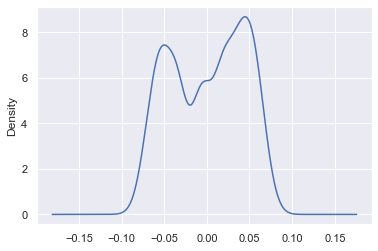

In [8]:
global_temp_diff['LandAndOceanAverageTemperature'].plot(kind='kde')

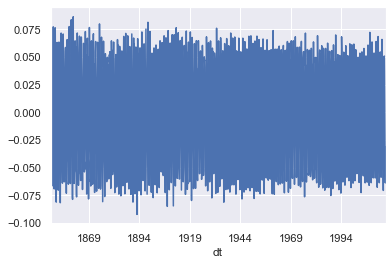

In [9]:
global_temp_diff['LandAndOceanAverageTemperature'].plot()

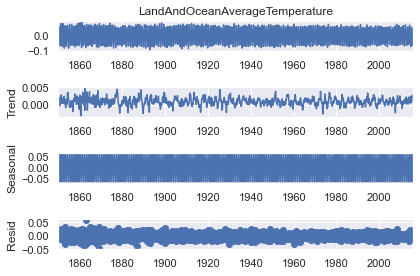

In [10]:
s_decomp = seasonal_decompose(global_temp_diff['LandAndOceanAverageTemperature'], model='additive', period=12)
s_decomp.plot()
plt.show()

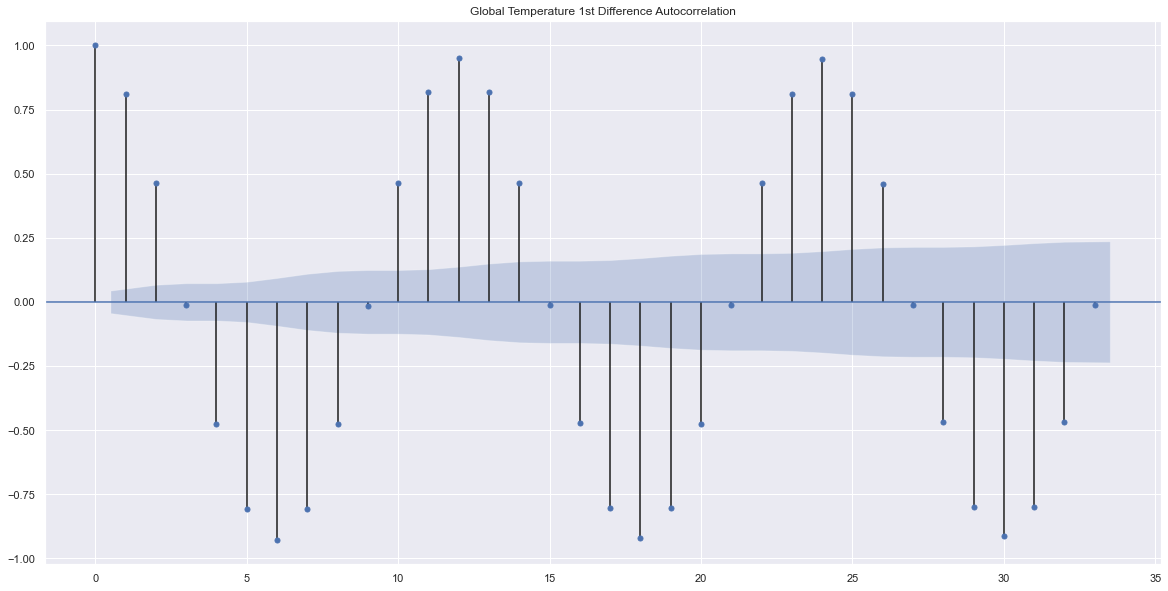

In [11]:
fig, ax = plt.subplots(figsize=(20,10))

ax = plot_acf(global_temp_diff['LandAndOceanAverageTemperature'], ax, title='Global Temperature 1st Difference Autocorrelation')

plt.show()

## creating lagged DF

In [12]:
lagged_df = pd.DataFrame()

In [13]:
for i in range(12, 0, -1):
    lagged_df[['t-' + str(i)]] = global_temp_diff.shift(i)


In [14]:
lagged_df['t'] = global_temp_diff['LandAndOceanAverageTemperature']

In [15]:
lagged_df

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
dt,,,,,,,,,,,,,
1850-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058833
1850-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058833,0.033485
1850-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058833,0.033485,0.044435
1850-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058833,0.033485,0.044435,0.057271
1850-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058833,0.033485,0.044435,0.057271,0.054556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,0.005655,-0.035895,-0.055729,-0.070497,-0.032821,-0.010756,0.021677,0.043189,0.050615,0.050871,0.036724,0.012708,-0.001249
2015-09-01,-0.035895,-0.055729,-0.070497,-0.032821,-0.010756,0.021677,0.043189,0.050615,0.050871,0.036724,0.012708,-0.001249,-0.030701
2015-10-01,-0.055729,-0.070497,-0.032821,-0.010756,0.021677,0.043189,0.050615,0.050871,0.036724,0.012708,-0.001249,-0.030701,-0.044519


In [16]:
lagged_df.dropna(axis=0, inplace=True)

### features and target

In [17]:
lagged_df.iloc[:, :-1]

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
dt,,,,,,,,,,,,
1851-02-01,0.058833,0.033485,0.044435,0.057271,0.054556,0.026295,-0.003873,-0.049767,-0.066411,-0.062976,-0.042959,-0.004135
1851-03-01,0.033485,0.044435,0.057271,0.054556,0.026295,-0.003873,-0.049767,-0.066411,-0.062976,-0.042959,-0.004135,0.006493
1851-04-01,0.044435,0.057271,0.054556,0.026295,-0.003873,-0.049767,-0.066411,-0.062976,-0.042959,-0.004135,0.006493,0.042457
1851-05-01,0.057271,0.054556,0.026295,-0.003873,-0.049767,-0.066411,-0.062976,-0.042959,-0.004135,0.006493,0.042457,0.053465
1851-06-01,0.054556,0.026295,-0.003873,-0.049767,-0.066411,-0.062976,-0.042959,-0.004135,0.006493,0.042457,0.053465,0.077254
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,0.005655,-0.035895,-0.055729,-0.070497,-0.032821,-0.010756,0.021677,0.043189,0.050615,0.050871,0.036724,0.012708
2015-09-01,-0.035895,-0.055729,-0.070497,-0.032821,-0.010756,0.021677,0.043189,0.050615,0.050871,0.036724,0.012708,-0.001249
2015-10-01,-0.055729,-0.070497,-0.032821,-0.010756,0.021677,0.043189,0.050615,0.050871,0.036724,0.012708,-0.001249,-0.030701


In [18]:
lagged_df.iloc[:, -1:]

,t
dt,
1851-02-01,0.006493
1851-03-01,0.042457
1851-04-01,0.053465
1851-05-01,0.077254
1851-06-01,0.045970
...,...
2015-08-01,-0.001249
2015-09-01,-0.030701
2015-10-01,-0.044519


In [19]:
X = lagged_df.iloc[:, :-1].values
y = lagged_df.iloc[:, -1:].values

In [20]:
train_size = int(len(X) * 0.8)

In [21]:
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:len(X)], y[0:train_size], y[train_size:len(X)]

In [22]:
print('train size ' +str(len(X_train) ))

print('test size ' +str(len(X_test) ))

train size 1583
test size 396


## Decicion Tree

does not work well with data w trend

In [23]:
global_temp_tree = DecisionTreeRegressor(max_depth= 5)
global_temp_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [24]:
global_temp_tree.score(X_train, y_train)

0.9607051766464941

In [25]:
global_temp_tree.score(X_test, y_test)

0.9595780333988496

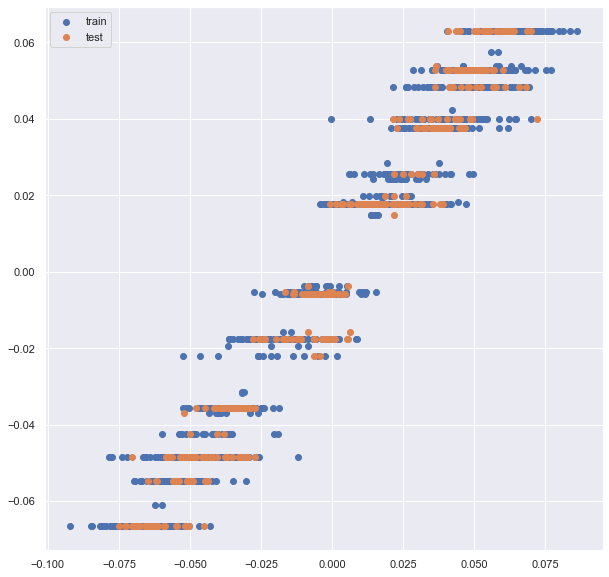

In [26]:
plt.subplots(figsize=(10,10))

# making predictions
train_prediction = global_temp_tree.predict(X_train)
test_prediction = global_temp_tree.predict(X_test)

# scatter with predictions and actual values


plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

## Random Forest

In [27]:
rfr = RandomForestRegressor(n_estimators=200, random_state=42)
rfr.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=200, random_state=42)

In [28]:
rfr.score(X_train, y_train)

0.9933541834276679

In [29]:
rfr.score(X_test, y_test)

0.9646418082635759

### grid search

In [30]:
grid = {'n_estimators': [50, 100, 200], 'max_depth': {3, 5, 7}, 'max_features': [2,3,4,5,6,7,8,9,10,11,12], 'random_state': [42]}
test_scores = []

In [31]:
for g in ParameterGrid(grid):
    rfr.set_params(**g)
    rfr.fit(X_train, y_train.ravel())
    test_scores.append(rfr.score(X_test, y_test))

In [32]:
best_score_index = np.argmax(test_scores)

In [33]:
bestGrid = list(ParameterGrid(grid))[best_score_index]

In [34]:
print(test_scores[best_score_index], bestGrid)

0.9651212708077237 {'max_depth': 7, 'max_features': 5, 'n_estimators': 100, 'random_state': 42}


In [35]:
rfr.set_params(**bestGrid)
rfr.fit(X_train, y_train.ravel())

RandomForestRegressor(max_depth=7, max_features=5, random_state=42)

In [36]:
rfr.score(X_train, y_train)

0.9742495628867105

In [37]:
rfr.score(X_test, y_test)

0.9651212708077237

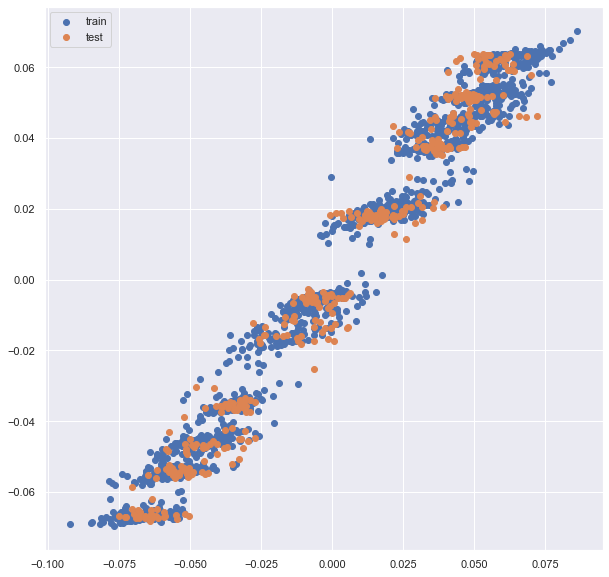

In [38]:
plt.subplots(figsize=(10,10))

# making predictions
train_prediction = rfr.predict(X_train)
test_prediction = rfr.predict(X_test)

# scatter with predictions and actual values
plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

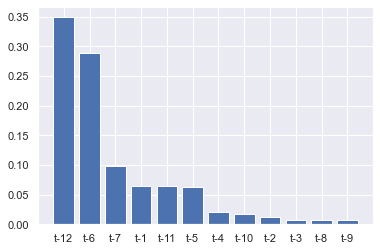

In [39]:
# importances of each feature in the model
importances = rfr.feature_importances_

# sort index by importances
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# label names
names = ['t-12','t-11','t-10','t-9','t-8','t-7','t-6','t-5','t-4','t-3','t-2','t-1']
# labels to importances
labels = np.array(names)[sorted_index]

plt.bar(x, importances[sorted_index], tick_label=labels)

plt.show()

## gradient boost tree regressor

In [40]:
gbr = GradientBoostingRegressor(max_features=2, learning_rate=0.01, n_estimators=50, subsample=0.6, random_state=42)
gbr.fit(X_train, y_train.ravel())
print('train score: ' + str(gbr.score(X_train, y_train)))
print('test score: ' + str(gbr.score(X_test, y_test)))

train score: 0.5802728895981581
test score: 0.6126660168799448


### grid search

In [41]:
grid = {'n_estimators': [50, 100, 200], 'max_depth': {3, 5, 7}, 'max_features': [2,3,4,5,6,7,8,9,10,11,12], 'learning_rate': [0.6,0.7,0.8,0.9], 'learning_rate': [0.01, 0.005, 0.02, 0.05, 0.1] ,'random_state': [42]}
test_scores = []

In [42]:
for g in ParameterGrid(grid):
    gbr.set_params(**g)
    gbr.fit(X_train, y_train.ravel())
    test_scores.append(gbr.score(X_test, y_test))

In [43]:
best_score_index = np.argmax(test_scores)
best_grid = list(ParameterGrid(grid))[5]
print(test_scores[best_score_index], best_grid)

0.9672311373181731 {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 3, 'n_estimators': 200, 'random_state': 42}


In [44]:
gbr.set_params(**best_grid)
gbr.fit(X_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_features=3, n_estimators=200,
                          random_state=42, subsample=0.6)

In [45]:
print('train score: ' + str(gbr.score(X_train, y_train)))
print('test score: ' + str(gbr.score(X_test, y_test)))

train score: 0.9336165441113425
test score: 0.9522162712984072


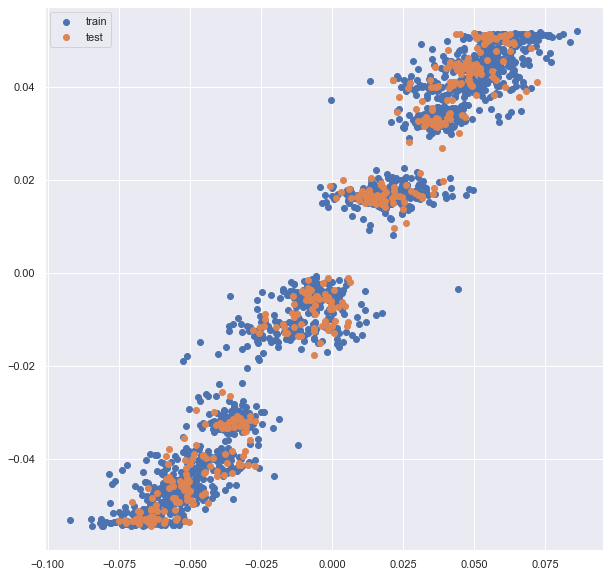

In [46]:
plt.subplots(figsize=(10,10))

# making predictions
train_prediction = gbr.predict(X_train)
test_prediction = gbr.predict(X_test)

# scatter with predictions and actual values
plt.scatter(y_train, train_prediction, label='train')
plt.scatter(y_test, test_prediction, label='test')
plt.legend()
plt.show()

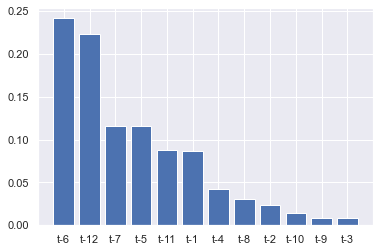

In [47]:
# importances of each feature in the model
importances = gbr.feature_importances_

# sort index by importances
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# label names
names = ['t-12','t-11','t-10','t-9','t-8','t-7','t-6','t-5','t-4','t-3','t-2','t-1']
# labels to importances
labels = np.array(names)[sorted_index]

plt.bar(x, importances[sorted_index], tick_label=labels)

plt.show()